# Parametryzacje i wykresy uwikłane

W tym pliku omówimy podstawy generowania wymiernych parametryzacji krzywych.

Wykres parametryczny może być generowany w SageMath za pomocą komendy `parametric_plot`.

Do narysowania wykresu funkcji uwikłanej służy komenda `implicit_plot`.

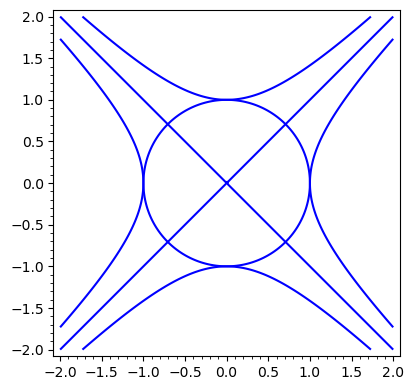

In [2]:
#Równanie okręgu x^2+y^2=1 oraz hiperboli x^2-y^2=1, y^2-x^2=1 i dwóch lini y^2=x^2
x,y,t=var('x,y,t')
lieq=[x^2+y^2-1==0,x^2-y^2-1==0,x^2-y^2==0,-x^2+y^2-1==0]
sum([implicit_plot(eq,(x,-2,2),(y,-2,2)) for eq in lieq])

# Okrąg $x^2+y^2=1$

Do sparametryzowania okręgu przeprowadzamy przez punkt $(1,0)$ pęk prostych z nachyleniem $t$ i przechodzących przez zadany punkt.

In [3]:
a,b=var('a,b')
print(solve([x==1,y==0,a*x+b==y],a,b,y,x))
t=var('t')
print(solve([x^2+y^2==1,t*x-t==y],x,y))

[
[a == r1, b == -r1, y == 0, x == 1]
]
[
[x == 1, y == 0],
[x == (t^2 - 1)/(t^2 + 1), y == -2*t/(t^2 + 1)]
]


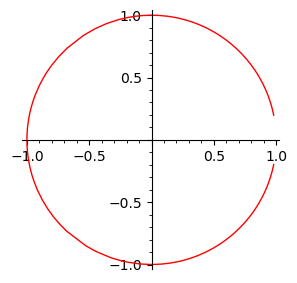

In [4]:
parametric_plot(((t^2 - 1)/(t^2 + 1),-2*t/(t^2 + 1)),(t,-10,10),figsize=[3,3],color='red')

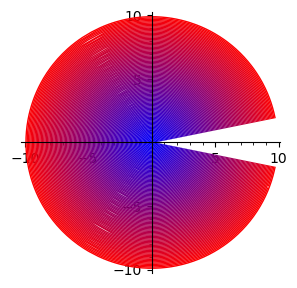

In [5]:
r=var('r')
sum([parametric_plot((r*(t^2 - 1)/(t^2 + 1),r*-2*t/(t^2 + 1)),(t,-10,10),
                     figsize=[3,3],color=(r/10,0,1-r/10)) for r in srange(0,10,0.1)])

# Kubika ostrzowa $y^2=x^3$

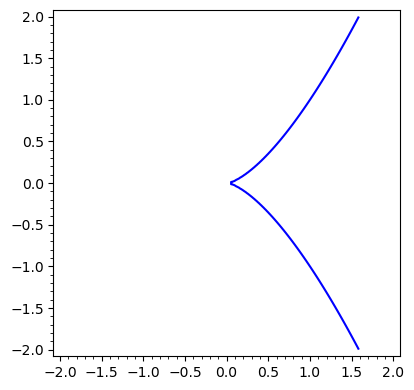

In [6]:
implicit_plot(y^2==x^3,(x,-2,2),(y,-2,2))

Parametryzujemy pękiem prostych przechodzących przez punkt $(0,0)$ i wsp. nachylenia $t$.

In [7]:
t=var('t')
solve([y^2==x^3,y==x*t],x,y)

[[x == t^2, y == t^3], [x == 0, y == 0]]

In [8]:
#inna parametryzacja (przechodząca przez inny punkt) y^2==x^3

In [9]:
p=(4,8)

In [10]:
(y-(a*x+b)).subs({x:4,y:8})

-4*a - b + 8

In [11]:
solve(-4*a - b + 8,b)

[b == -4*a + 8]

In [12]:
solve([y^2==x^3,y==t*x+(-4*t + 8)],x,y) #this does not lead to a rational parametriozation

[[x == 1/2*t^2 - 1/2*sqrt(t^2 + 4*t - 12)*(t - 2) - 2, y == 1/2*t^3 - 1/2*sqrt(t^2 + 4*t - 12)*(t^2 - 2*t) - 6*t + 8], [x == 1/2*t^2 + 1/2*sqrt(t^2 + 4*t - 12)*(t - 2) - 2, y == 1/2*t^3 + 1/2*sqrt(t^2 + 4*t - 12)*(t^2 - 2*t) - 6*t + 8], [x == 4, y == 8]]

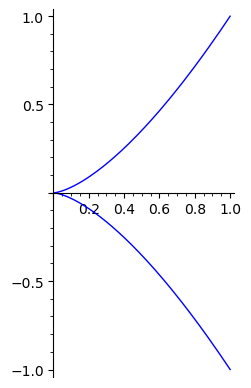

In [13]:
parametric_plot((t^2,t^3),(t,-1,1))

# Kubika węzłowa $y^2=x^2(x+1)$

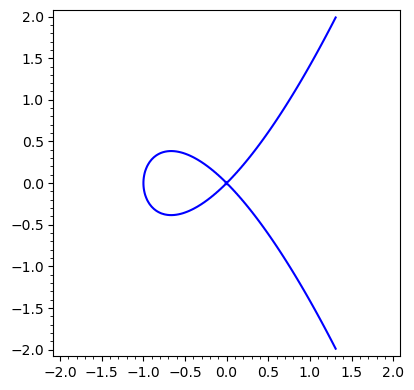

In [14]:
implicit_plot(y^2==x^2*(x+1),(x,-2,2),(y,-2,2))

In [15]:
t=var('t')
solve([y^2==x^2*(x+1),y==x*t],x,y)

[[x == t^2 - 1, y == t^3 - t], [x == 0, y == 0]]

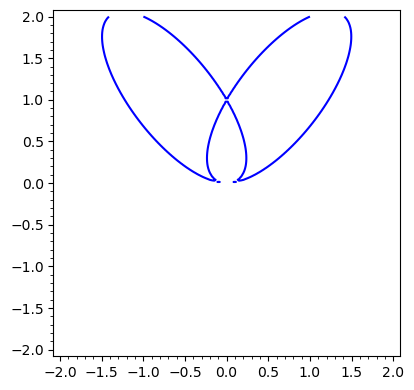

In [16]:
#tacnode
implicit_plot(2*x^4 - 3*x^2*y + y^4 - 2*y^3 + y^2,(x,-2,2),(y,-2,2))

In [17]:
(2*x^4 - 3*x^2*y + y^4 - 2*y^3 + y^2).subs({y:x*t}).factor()

(t^4*x^2 - 2*t^3*x + t^2 - 3*t*x + 2*x^2)*x^2

In [18]:
solve(t^4*x^2 - 2*t^3*x + t^2 - 3*t*x + 2*x^2,x)

[x == 1/2*(2*t^3 - sqrt(12*t^2 + 1)*t + 3*t)/(t^4 + 2), x == 1/2*(2*t^3 + sqrt(12*t^2 + 1)*t + 3*t)/(t^4 + 2)]

In [19]:
#12*t^2 + 1==c^2

In [20]:
#wybierz na start, t=0,c=1
c,r=var('c,r')
#pęl prostych c==t*r+1
(12*t^2 + 1-c^2).subs({c:t*r+1}).factor()

-(r^2*t + 2*r - 12*t)*t

In [21]:
solve(r^2*t + 2*r - 12*t,t)

[t == -2*r/(r^2 - 12)]

In [22]:
(2*x^4 - 3*x^2*y + y^4 - 2*y^3 + y^2).subs({y:x*(-2*r/(r^2 - 12))}).factor()

2*(r^4*x + 2*r^3 - 32*r^2*x - 24*r + 288*x)*(r^4*x + r^3 - 16*r^2*x - 12*r + 72*x)*x^2/(r^2 - 12)^4

In [23]:
solve(r^4*x + r^3 - 16*r^2*x - 12*r + 72*x,x)

[x == -(r^3 - 12*r)/(r^4 - 16*r^2 + 72)]

In [24]:
#znajdź współrzędną y
(x*(-2*r/(r^2 - 12))).subs({x:-(r^3 - 12*r)/(r^4 - 16*r^2 + 72)}).factor()

2*r^2/(r^4 - 16*r^2 + 72)

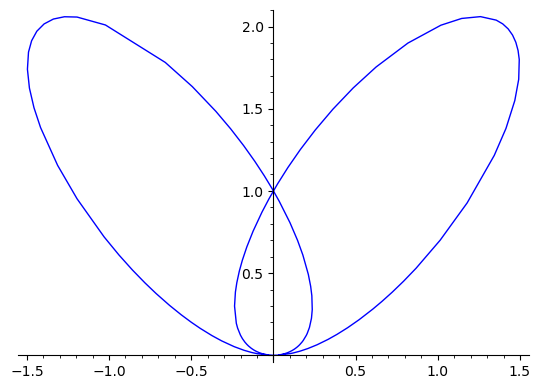

In [25]:
parametric_plot((-(r^3 - 12*r)/(r^4 - 16*r^2 + 72),2*r^2/(r^4 - 16*r^2 + 72)),(r,-30,30))

# Lemniskata Bernoulliego $(x^2+y^2)^2=2(x^2-y^2)$

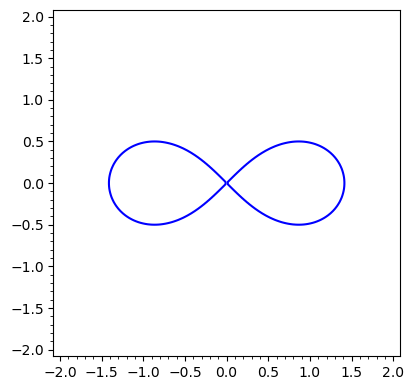

In [26]:
implicit_plot((x^2+y^2)^2==2*(x^2-y^2),(x,-2,2),(y,-2,2))

In [27]:
t=var('t')
solve([(x^2+y^2)^2==2*(x^2-y^2),y==x*t],x,y)

[[x == -sqrt(-2*t^2 + 2)/(t^2 + 1), y == -sqrt(-2*t^2 + 2)*t/(t^2 + 1)], [x == sqrt(-2*t^2 + 2)/(t^2 + 1), y == sqrt(-2*t^2 + 2)*t/(t^2 + 1)], [x == 0, y == 0]]

Otrzymana parametryzacja nie jest wymierna! Zamienimy ją w parametryzację wymierna zastępując pierwiastek stosownym wyrażeniem.

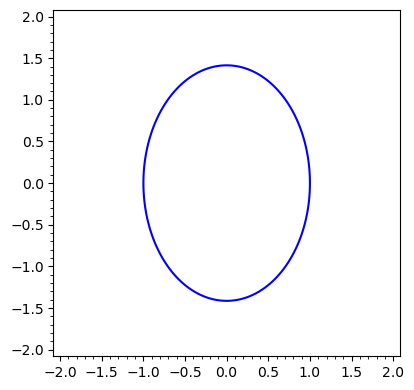

In [28]:
c=var('c')
implicit_plot(-2*t^2 + 2==c^2,(t,-2,2),(c,-2,2))

Parametryzujemy elipsę prostymi $c=r t-r$

In [29]:
r,t,c=var('r,t,c')
solve([-2*t^2 + 2==c^2,c==r*t-r],t,c)

[[t == 1, c == 0], [t == (r^2 - 2)/(r^2 + 2), c == -4*r/(r^2 + 2)]]

Podstawiamy $t=t(r)$

In [30]:
x,y,r=var('x,y,r')
pretty_print(solve([(x^2+y^2)^2==2*(x^2-y^2),y==x*((r^2 - 2)/(r^2 + 2))],x,y))

[[x == 2*(r^3 + 2*r)/(r^4 + 4), y == 2*(r^3 - 2*r)/(r^4 + 4)], [x == -2*(r^3 + 2*r)/(r^4 + 4), y == -2*(r^3 - 2*r)/(r^4 + 4)], [x == 0, y == 0]]

Parametryzacja 1

In [31]:
solve([(x^2+y^2)^2==2*(x^2-y^2),y==x*((r^2 - 2)/(r^2 + 2))],x,y)[0]

[x == 2*(r^3 + 2*r)/(r^4 + 4), y == 2*(r^3 - 2*r)/(r^4 + 4)]

In [0]:
parametric_plot((2*(r^3 + 2*r)/(r^4 + 4),2*(r^3 - 2*r)/(r^4 + 4)),(r,0,5),figsize=[3,3])

Parametryzacja 2

In [0]:
solve([(x^2+y^2)^2==2*(x^2-y^2),y==x*((r^2 - 2)/(r^2 + 2))],x,y)[1]

In [0]:
parametric_plot((-2*(r^3 + 2*r)/(r^4 + 4),-2*(r^3 - 2*r)/(r^4 + 4)),(r,0,5),figsize=[3,3])

In [0]:
#wykres "uzupełnia się", gdy r zbliża się do +- nieskończonosci
parametric_plot((-2*(r^3 + 2*r)/(r^4 + 4),-2*(r^3 - 2*r)/(r^4 + 4)),(r,-10,10),figsize=[3,3])

In [0]:
expr1=(-2*(r^3 + 2*r)/(r^4 + 4));

In [0]:
print (-2*(r^3 + 2*r)/(r^4 + 4)).limit(r=oo)
print (-2*(r^3 - 2*r)/(r^4 + 4)).limit(r=oo)
print (-2*(r^3 + 2*r)/(r^4 + 4)).limit(r=-oo)
print (-2*(r^3 - 2*r)/(r^4 + 4)).limit(r=-oo)

In [0]:
#genus krzywej jest 0 wtw krzywa posiada wymierną parametryzację

Aff.<x,y>=AffineSpace(QQ,2)
S1=Aff.curve([(x^2+y^2)^2-2*(x^2-y^2)])

In [0]:
#Formuła Plueckera

In [0]:
S1.genus()

In [0]:
E1=Aff.curve([y^2-(x^3+1)])
E1.genus()

In [0]:
#to równanie y^2=x^3+1 nie ma wymiernej parametryzacji!